<h1><center> Fraud Analytics using Predictive and Social Network Techniques (CS6890) </center></h1>
<h2><center> Cost Sensitive Regression </center></h2>

<h3>Team members:</h3>
<center>
    <h4>
        <table>
            <tr>
                <th> Name </th>
                <th> Roll Number </th>
            </tr>
            <tr>
                <td> Kritik Agarwal </td>
                <td> CS23MTECH11009 </td>
            </tr>
            <tr>
                <td> Raghavendra Kulkarni </td>
                <td> CS23MTECH11016 </td>
            </tr>
            <tr>
                <td> Arnab Ghosh </td>
                <td> CS23MTECH11025 </td>
            </tr>
            <tr>
                <td> Shagun Sharma </td>
                <td> CS23MTECH14013 </td>
            </tr>
            <tr>
                <td> Trishita Saha </td>
                <td> CS23MTECH14016 </td>
            </tr>
        </table>
    </h4>
</center>

### Import the Required Packages

In [1]:
# Packages for Data Handling
import numpy as np
import pandas as pd

# Packages for Preprocessing and Data Preparation
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Packages for Training Models
from sklearn.linear_model import LogisticRegression
from scipy.optimize import differential_evolution

# Packages for Results Visualization
import matplotlib.pyplot as plt

### Load the Dataset

In [2]:
# Open the file and load the dataset in a Pandas Dataframe
data = pd.read_csv('costsensitiveregression.csv')
data.head()

,NotCount,YesCount,ATPM,PFD,PFG,SFD,SFG,WP,WS,AH,AN,Status,FNC
0,2,21,0.0,0.000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0,0.0
1,23,0,0.0,0.044,0.0,0.0,0.0,0.306179,0.0,0.0,0.0,1,0.0
2,1,22,0.0,0.000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0,0.0
3,5,18,0.0,0.000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1,0.0
4,1,22,0.0,0.000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0,0.0


### Data Preprocessing

In [3]:
# Check for any missing values in the dataset
data.isnull().sum()

NotCount    0
YesCount    0
ATPM        0
PFD         0
PFG         0
SFD         0
SFG         0
WP          0
WS          0
AH          0
AN          0
Status      0
FNC         0
dtype: int64

In [4]:
# Split the dataset into dependent and independent columns
X = data.drop('Status', axis = 1)
y = data['Status']

# Examine the data range of the columns
X.describe()

,NotCount,YesCount,ATPM,PFD,PFG,SFD,SFG,WP,WS,AH,AN,FNC
count,147636.000000,147636.000000,147636.000000,147636.000000,147636.000000,147636.000000,147636.000000,147636.000000,147636.000000,147636.000000,147636.000000,1.476360e+05
mean,7.722107,15.220908,0.253245,0.027062,0.050789,0.021648,0.071709,0.271927,0.493587,0.045045,0.013474,5.334049e+02
std,7.574278,7.596921,0.366280,0.335509,0.373370,0.298285,1.135755,2.432425,0.763389,0.182274,0.100973,8.774011e+03
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,2.000000,10.000000,0.001084,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.820820e-01
50%,4.000000,19.000000,0.033354,0.000000,0.000000,0.000000,0.000000,0.000000,0.097875,0.000000,0.000000,1.183562e+01
75%,13.000000,21.000000,0.394372,0.000000,0.000000,0.000000,0.000000,0.061840,0.880929,0.000000,0.000000,1.069840e+02
max,23.000000,22.000000,1.000000,79.837480,51.944780,61.556900,209.021870,399.606420,5.000000,1.000000,1.000000,1.703186e+06


In [5]:
# Min-Max normalize all the independent columns except False Negative Cost column
scaler = MinMaxScaler()
for column in list(X.columns):
    if column == 'FNC':
        continue
    X[column] = scaler.fit_transform(X[column].values.reshape(-1, 1))
X.head()

,NotCount,YesCount,ATPM,PFD,PFG,SFD,SFG,WP,WS,AH,AN,FNC
0,0.086957,0.954545,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,1.000000,0.000000,0.0,0.000551,0.0,0.0,0.0,0.000766,0.0,0.0,0.0,0.0
2,0.043478,1.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.217391,0.818182,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.043478,1.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [6]:
# Split the dataset into training and testing values
X_train, X_test, y_train, y_test = train_test_split(X, np.asarray(y), test_size = 0.1, random_state = 42)

# Split the independent columns to separate the False Negative Cost from the Training data
train_FNC = np.asarray(X_train['FNC'])
X_train = np.asarray(X_train.drop('FNC', axis = 1))
test_FNC = np.asarray(X_test['FNC'])
X_test = np.asarray(X_test.drop('FNC', axis = 1))

# Print the Training and Testing data size
print('Train size:{}'.format(len(X_train)))
print('Test size:{}'.format(len(X_test)))

Train size:132872
Test size:14764


In [7]:
def evaluate(y_pred, y_true, fnc):
    accuracy, cost = 0, 0
    for i in range(len(y_pred)):
        if y_pred[i] == y_true[i]:
            accuracy += 1
            if y_pred[i] == 1:
                cost += 6
        else:
            if y_pred[i] == 1:
                cost += 6
            else:
                cost += fnc[i]
    return accuracy/len(y_pred), cost

### Standard Logistic Regression

In [8]:
# Train a standard Logistic Regression model
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# Calculate the classification cost on the training data
y_pred = classifier.predict(X_train)
y_pred = (y_pred >= 0.5).astype(int)
train_accuracy, train_cost = evaluate(y_pred, y_train, train_FNC)

# Calculate the classification cost on the testing data
y_pred = classifier.predict(X_test)
y_pred = (y_pred >= 0.5).astype(int)
test_accuracy, test_cost = evaluate(y_pred, y_test, test_FNC)

# Print the accuracy and classification costs for training and test data
print('Train Accuracy: {}'.format(train_accuracy))
print('Train Cost: {}'.format(train_cost))
print('Test Accuracy: {}'.format(test_accuracy))
print('Test Cost: {}'.format(test_cost))

# Store the classification costs in a list
train_result = [train_cost]
test_result = [test_cost]

Train Accuracy: 0.8666837256908905
Train Cost: 4136710.567949
Test Accuracy: 0.8622324573286372
Test Cost: 394769.06130299997


### Bahnsen's Approach

In [9]:
# Define the Bahnsen Cost Sensitive Regression model
class bahnsenCostSensitiveRegression:

    # Initialize the model with the required parameters
    def __init__(self, features):
        self.features = features
        pass

    # Define the sigmoid function
    def sigmoid(self, z):
        return 1/(1 + np.exp(-z))

    # Define the function to predict the output for an input set
    def predict(self, X, parameters):
        z = np.dot(X, parameters[1:]) + parameters[0]
        return self.sigmoid(z)

    # Define the function to calculate the classification cost of the model
    def computeCost(self, parameters, X, y_true, tpc, tnc, fpc, fnc):
        y_pred = self.sigmoid(np.dot(X, parameters[1:]) + parameters[0])
        n = len(y_pred)
        cost = np.sum(np.multiply(y_true, (np.multiply(y_pred, tpc) + np.multiply(1 - y_pred, fnc))) + 
                      np.multiply(1 - y_true, (np.multiply(y_pred, fpc) + np.multiply(1 - y_pred, tnc))))
        cost /= n
        return cost
    
    # Define a function to fit the model using genetic algorithms
    def fit(self, X, y, tpc, tnc, fpc, fnc):
        bounds = [(-1e2, 1e2)]*(self.features + 1)
        genetic = differential_evolution(self.computeCost, bounds, args = (X, y, tpc, tnc, fpc, fnc))
        self.parameters = genetic.x
        print(genetic)
        return

In [10]:
# Initialize the Bahnsen Cost Sensitive Regression model and fit the data
model1 = bahnsenCostSensitiveRegression(features = X_train.shape[1])
model1.fit(X = X_train, y = y_train, tpc = 6, tnc = 0, fpc = 6, fnc = train_FNC)

 message: Optimization terminated successfully.
 success: True
     fun: 3.382669570091211
       x: [ 4.868e+01  1.000e+02 -1.000e+02  4.308e+01 -1.000e+02
            9.999e+01 -4.854e+01 -9.867e+01  8.554e+01  1.622e-01
           -6.716e-01 -7.566e+00]
     nit: 75
    nfev: 15032
     jac: [-4.441e-08 -4.046e-04  4.014e-04  2.442e-06  1.448e-05
            6.217e-06  4.441e-08  8.571e-06 -2.220e-07  1.377e-06
            3.331e-06  7.105e-07]


In [11]:
# Calculate the classification cost on the training data
y_pred = model1.predict(X_train, model1.parameters)
y_pred = (y_pred >= 0.5).astype(int)
train_accuracy, train_cost = evaluate(y_pred, y_train, train_FNC)

# Calculate the classification cost on the testing data
y_pred = model1.predict(X_test, model1.parameters)
y_pred = (y_pred >= 0.5).astype(int)
test_accuracy, test_cost = evaluate(y_pred, y_test, test_FNC)

# Print the accuracy and classification costs for training and test data
print('Train Accuracy: {}'.format(train_accuracy))
print('Train Cost: {}'.format(train_cost))
print('Test Accuracy: {}'.format(test_accuracy))
print('Test Cost: {}'.format(test_cost))

# Store the classification costs in a list
train_result.append(train_cost)
test_result.append(test_cost)

Train Accuracy: 0.7698837979408755
Train Cost: 446740.8988630018
Test Accuracy: 0.7649011108100786
Test Cost: 50819.32141699998


### Gunnemann's Approach

In [12]:
# Define the Gunnemann Cost Sensitive Regression model
class gunnemannCostSensitiveRegression:

    # Initialize the model with the required parameters
    def __init__(self, features):
        self.features = features
        pass

    # Define the sigmoid function
    def sigmoid(self, z):
        return 1/(1 + np.exp(-z))

    # Define the function to predict the output for an input set
    def predict(self, X, parameters):
        z = np.dot(X, parameters[1:]) + parameters[0]
        return self.sigmoid(z)

    # Define the function to calculate the classification cost of the model
    def computeCost(self, parameters, X, y_true, tpc, tnc, fpc, fnc):
        y_pred = self.sigmoid(np.dot(X, parameters[1:]) + parameters[0])
        n = len(y_pred)
        log_pred = np.array([np.log(y) if y != 0 else 0 for y in y_pred])
        log_neg_pred = np.array([np.log(y) if y != 0 else 0 for y in (1 - y_pred)])
        cost = np.sum(np.multiply(y_true, (np.multiply(-log_pred, tpc) + np.multiply(-log_neg_pred, fnc))) + 
                      np.multiply(1 - y_true, (np.multiply(-log_pred, fpc) + np.multiply(-log_neg_pred, tnc))))
        cost /= n
        return cost
    
    # Define a function to fit the model using genetic algorithms
    def fit(self, X, y, tpc, tnc, fpc, fnc):
        bounds = [(-1e2, 1e2)]*(self.features + 1)
        genetic = differential_evolution(self.computeCost, bounds, args = (X, y, tpc, tnc, fpc, fnc))
        self.parameters = genetic.x
        print(genetic)
        return

In [13]:
# Initialize the Gunnemann Cost Sensitive Regression model and fit the data
model2 = gunnemannCostSensitiveRegression(features = X_train.shape[1])
model2.fit(X = X_train, y = y_train, tpc = 6, tnc = 0, fpc = 6, fnc = train_FNC)

 message: Optimization terminated successfully.
 success: True
     fun: 0.0
       x: [ 7.448e+01  9.591e+01  1.170e+01  2.100e+01 -2.912e-01
           -6.030e+00 -2.799e+01  2.145e+01  8.866e+01 -3.920e+01
            1.603e+01  9.676e+01]
     nit: 14
    nfev: 2713


In [14]:
# Calculate the classification cost on the training data
y_pred = model2.predict(X_train, model2.parameters)
y_pred = (y_pred >= 0.5).astype(int)
train_accuracy, train_cost = evaluate(y_pred, y_train, train_FNC)

# Calculate the classification cost on the testing data
y_pred = model2.predict(X_test, model2.parameters)
y_pred = (y_pred >= 0.5).astype(int)
test_accuracy, test_cost = evaluate(y_pred, y_test, test_FNC)

# Print the accuracy and classification costs for training and test data
print('Train Accuracy: {}'.format(train_accuracy))
print('Train Cost: {}'.format(train_cost))
print('Test Accuracy: {}'.format(test_accuracy))
print('Test Cost: {}'.format(test_cost))

# Store the classification costs in a list
train_result.append(train_cost)
test_result.append(test_cost)

Train Accuracy: 0.29824191703293396
Train Cost: 797232
Test Accuracy: 0.30167976158222704
Test Cost: 88584


### Results Comparison

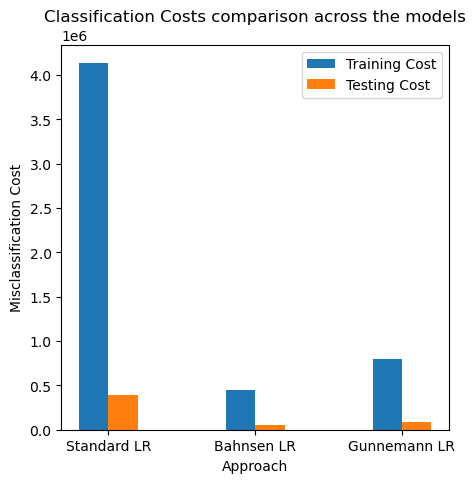

In [15]:
# Plot the joint bar plot to compare the training and testing classification costs across the models
types = ['Standard LR', 'Bahnsen LR', 'Gunnemann LR']
x = np.arange(len(types))
plt.figure(figsize = (5, 5))
plt.bar(x - 0.1, train_result, width = 0.2, label='Training Cost')
plt.bar(x + 0.1, test_result, width = 0.2, label='Testing Cost')
plt.xticks(x, types)
plt.xlabel('Approach')
plt.ylabel('Misclassification Cost')
plt.legend()
plt.title('Classification Costs comparison across the models')
plt.savefig('Results.png')
plt.show()